# Logistic Regression Modelling

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

### Read the CSV and Perform Basic Data Cleaning

In [2]:
# Import depedencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [4]:
# File path 
data_file = os.path.join("","Resources","data","exoplanet_data.csv")
model_result = os.path.join("","Resources","results","LogisticRegression.csv")

In [5]:
# Read data
df = pd.read_csv(data_file)

In [6]:
# Display Sample data
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [7]:
# Check data size
df.shape

(6991, 41)

In [8]:
# Check datafrme for summary and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [9]:
# Check null values
df.isna().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [10]:
# Check dependent variable unique value
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [11]:
# Use label encoding for depdendent variable
number = LabelEncoder()
df['koi_disposition']= number.fit_transform(df['koi_disposition'])

In [12]:
# Display results
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,1,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,1,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [13]:
#Statistical summary :df descriptions
print(df.describe())

       koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
count      6991.000000    6991.000000    6991.000000    6991.000000   
mean          1.259906       0.157059       0.244743       0.202975   
std           0.821628       0.363882       0.429966       0.402243   
min           0.000000       0.000000       0.000000       0.000000   
25%           1.000000       0.000000       0.000000       0.000000   
50%           2.000000       0.000000       0.000000       0.000000   
75%           2.000000       0.000000       0.000000       0.000000   
max           2.000000       1.000000       1.000000       1.000000   

       koi_fpflag_ec   koi_period  koi_period_err1  koi_period_err2  \
count    6991.000000  6991.000000     6.991000e+03     6.991000e+03   
mean        0.125018    56.191248     1.851122e-03    -1.851122e-03   
std         0.330763   117.570962     7.184503e-03     7.184503e-03   
min         0.000000     0.259820     1.100000e-08    -1.568000e-01   
25%  

In [14]:
# koi_disposition distribution
print(df.groupby('koi_disposition').size())

koi_disposition
0    1687
1    1800
2    3504
dtype: int64


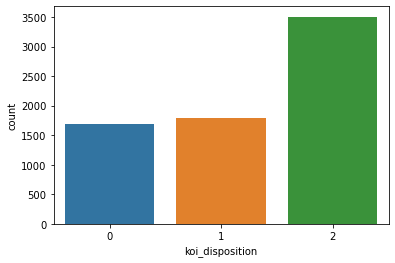

In [15]:
# Data distribution
sns.countplot(x="koi_disposition",data=df)
plt.show()

In [16]:
#Notice that data size for the classes is not uniform 

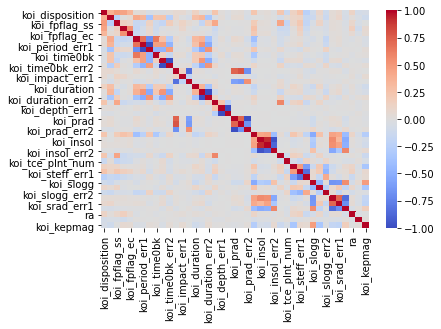

In [17]:
sns.heatmap(df.corr(),cbar=True,cmap='coolwarm')

In [18]:
# Let's seperate dependent and independent variables
X= df.drop(columns = ['koi_disposition'])
y = df['koi_disposition']

In [19]:
# Get feature list
feature_name = X.columns.tolist()

### Pre-processing model performace

In [20]:
# Shape of independent variable or features
X.shape

(6991, 40)

In [21]:
# Split data to train and test and check size of train data.
# Using 75-/25 split with random state as 420 (hyper parameter)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.25)

# Print shape of train data
print(X_train.shape)

(5243, 40)


In [22]:
# Scale data

In [23]:
# Get scaler reference
scaler = MinMaxScaler()

In [24]:
# Fit independent variablea or features
scaler.fit(X_train)

MinMaxScaler()

In [25]:
# Transfor features
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

In [26]:
# Check the shape of features
X_train.shape

(5243, 40)

In [27]:
# Build Model
base_model = LogisticRegression(solver='newton-cg', multi_class='auto')

In [28]:
# Train model
base_model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [29]:
# Predict 
pred_base = base_model.predict(X_test)

In [30]:
# Get train and test scores
training_score = round(base_model.score(X_train, y_train)*100,3)
test_score = round(accuracy_score(y_test, pred_base)*100,3)

In [31]:
# Evaluate predictions
print(accuracy_score(y_test, pred_base))
print(confusion_matrix(y_test, pred_base))
print(classification_report(y_test, pred_base))

0.8392448512585813
[[244 191   6]
 [ 68 362  12]
 [  4   0 861]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64       441
           1       0.65      0.82      0.73       442
           2       0.98      1.00      0.99       865

    accuracy                           0.84      1748
   macro avg       0.80      0.79      0.79      1748
weighted avg       0.85      0.84      0.84      1748



In [32]:
print(f"Training Data Score: {training_score} %")
print(f"Testing Data Score: {test_score} %")

Training Data Score: 85.428 %
Testing Data Score: 83.924 %


In [33]:
# Apply feature selection methods on the split data. 
# Reason - select features based on the information from the training set, not on the whole data set. 
# Hold out part of the whole data set as a test set to evaluate the performance of the feature selection and the model.
# Thus the information from the test set cannot be seen while we conduct feature selection and train the model.

In [34]:
# The data has 40 features.

# Select Features 

### Feature selection using Support Vector Classifiers (SVC) 

In [35]:
from sklearn.svm import LinearSVC

# Being classification problem, we will be using linear  
lsvc = LinearSVC(tol=0.0001, C=1.0, multi_class='ovr', penalty="l2", loss='squared_hinge',dual=True).fit(X_train,y_train)
model = SelectFromModel(lsvc, prefit=True)
linearSVC_support = model.get_support()

print(linearSVC_support)

[ True  True  True  True  True False False False  True  True False False
 False  True  True  True  True False False False False False  True False
 False False False False False  True False False False False False False
 False False False False]


In [36]:
df.shape

(6991, 41)

In [37]:
# Retained columns after feature selection
columns_retained_Select = df.iloc[:, 1:].columns[linearSVC_support].values

In [38]:
columns_retained_Select

array(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk_err1', 'koi_time0bk_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2',
       'koi_depth', 'koi_teq', 'koi_steff_err1'], dtype=object)

In [39]:
# Build Data frame from the selected columns
df= pd.DataFrame(X, columns=columns_retained_Select)

In [40]:
#Statistical summary :df descriptions
print(df.describe())

       koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
count    6991.000000    6991.000000    6991.000000    6991.000000   
mean        0.157059       0.244743       0.202975       0.125018   
std         0.363882       0.429966       0.402243       0.330763   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        koi_period  koi_time0bk_err1  koi_time0bk_err2  koi_duration  \
count  6991.000000       6991.000000       6991.000000   6991.000000   
mean     56.191248          0.009340         -0.009340      5.549368   
std     117.570962          0.021989          0.021989      6.425205   
min       0.259820          0.000009         -0.569000      0.167000   
25%       2.620126

In [41]:
# Assign features
X=df

In [42]:
# Check shape of new df with selected features
X.shape

(6991, 13)

### Data Scaling

Scale the data using the MinMaxScaler

In [43]:
# Get scaler reference
scaler = MinMaxScaler()

In [44]:
# Fit independent variablea or features
scaler.fit(X)

MinMaxScaler()

In [45]:
# Transfor features
X = scaler.transform(X)

In [46]:
# Check the shape of features
X.shape

(6991, 13)

## Create a Train Test Split

In [47]:
# Split df to get train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=420)

In [48]:
# Check train data shape 
X_train.shape

(4893, 13)

In [49]:
# Check test data shape 
X_test.shape

(2098, 13)

# Train the Model



In [50]:
# Build Model
model_selectFeature = LogisticRegression(solver='newton-cg', multi_class='auto')

In [51]:
# Train model
model_selectFeature.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [52]:
# Predict 
pred_selectFeature = model_selectFeature.predict(X_test)

In [53]:
# Get train and test scores
training_selectFeature_score = round(model_selectFeature.score(X_train, y_train)*100,3)
test_selectFeature_score = round(accuracy_score(y_test, pred_selectFeature)*100,3)

In [54]:
# Evaluate predictions
print(accuracy_score(y_test, pred_selectFeature))
print(confusion_matrix(y_test, pred_selectFeature))
print(classification_report(y_test, pred_selectFeature))

0.8403241182078169
[[ 282  231    7]
 [  78  435   14]
 [   5    0 1046]]
              precision    recall  f1-score   support

           0       0.77      0.54      0.64       520
           1       0.65      0.83      0.73       527
           2       0.98      1.00      0.99      1051

    accuracy                           0.84      2098
   macro avg       0.80      0.79      0.78      2098
weighted avg       0.85      0.84      0.84      2098



In [55]:
print(f"Training Data Score: {training_selectFeature_score} %")
print(f"Testing Data Score: {test_selectFeature_score} %")

Training Data Score: 84.835 %
Testing Data Score: 84.032 %


In [56]:
# Train (0.84) and test (0.84) results are same

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [57]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [58]:
# Create a based model
lr_model = LogisticRegression(solver='newton-cg', multi_class='auto')

# Instantiate the grid search model
grid_search = GridSearchCV(lr_model, hyperparameters, cv=5, verbose=0)

In [59]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l2']})

In [60]:
# Print grid param and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1291.5496650148827, 'penalty': 'l2'}
0.8810542872719752


In [61]:
# Use grid search to tune parameters
grid_search_new = GridSearchCV(cv=5,
             estimator=lr_model,
             param_grid={'C': [1291.5496650148827],
                         'penalty': ['l2']})

In [62]:
# USe hyper parameter for fit
grid_search_new.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': [1291.5496650148827], 'penalty': ['l2']})

In [64]:
# Get prediction 
y_pred = grid_search_new.predict(X_test)

In [65]:
# Get train and test scores
training_tuned_score = round(grid_search_new.score(X_train, y_train)*100,3)
test_tuned_score = round(accuracy_score(y_test, y_pred)*100,3)

In [66]:
# Print matrix results
print("Accuracy score %s" %accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print("Classification report  \n %s" %(classification_report(y_test, y_pred)))

Accuracy score 0.880838894184938
[[ 359  154    7]
 [  70  443   14]
 [   5    0 1046]]
Classification report  
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       520
           1       0.74      0.84      0.79       527
           2       0.98      1.00      0.99      1051

    accuracy                           0.88      2098
   macro avg       0.85      0.84      0.84      2098
weighted avg       0.88      0.88      0.88      2098



In [67]:
# Print train and test accuracy for the tuned model
print(f"Training Data Score (Tuned model): {training_tuned_score} %")
print(f"Testing Data Score (Tuned model): : {test_tuned_score} %")

Training Data Score (Tuned model): 88.167 %
Testing Data Score (Tuned model): : 88.084 %


In [68]:
# Train and test results of tuned model is very close so tuned model is good to put in use.

### Model Evaluation

In [69]:
predictions = grid_search_new.predict(X_test)
classifications = y_test.unique().tolist()

prediction_actual = {
    'Actual': number.inverse_transform(y_test),
    'Prediction': number.inverse_transform(predictions)
}

PA_df = pd.DataFrame(prediction_actual)
PA_df = PA_df.set_index('Actual').reset_index()
PA_df.head(15)

,Actual,Prediction
0,FALSE POSITIVE,FALSE POSITIVE
1,FALSE POSITIVE,FALSE POSITIVE
2,CONFIRMED,CANDIDATE
3,FALSE POSITIVE,FALSE POSITIVE
4,CONFIRMED,CONFIRMED
5,CONFIRMED,CONFIRMED
6,FALSE POSITIVE,FALSE POSITIVE
7,CONFIRMED,CONFIRMED
8,FALSE POSITIVE,FALSE POSITIVE
9,CANDIDATE,CANDIDATE


In [70]:
# Save results in csv file

In [71]:
evaluations = {'': ['Base Model', 'Select Features Model', 'Tuned Model'],
               'Accuracy': [f"{test_score}%", f"{test_selectFeature_score}%", f"{test_tuned_score}%"]}

evaluations_df = pd.DataFrame(evaluations)
evaluations_df = evaluations_df.set_index('')

evaluations_df.to_csv(model_result)
evaluations_df

,Accuracy
,
Base Model,83.924%
Select Features Model,84.032%
Tuned Model,88.084%


### Summary: 
- Base model accuracy of  83.92% was improved with feature selection to 84.03% and to 88.08% with tuned model (using gridSearch). 